# Applied math concepts for machine learning - Group 6 project

Students name in this Group:
- Gabriel Okazaki
- Julio Socher
- Kateryna Solonenko
- Mohit Sabharwal
- Riya Gupta
- Vaibhav Saini

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

## Data preprocessing

### Processing 'Sex' categorical column

In [5]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [6]:
df_dummies = pd.get_dummies(df['Sex'], dtype=int)
df_processed = pd.concat([df, df_dummies], axis=1)
del df_processed['Sex']
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1


### Processing 'ChestPainType' categorical column

In [7]:
df_processed['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()
df_processed['ChestPainType']= encoder.fit_transform(df_processed['ChestPainType'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,2,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,2,150,195,0,Normal,122,N,0.0,Up,0,0,1


In [10]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}

### Processing 'RestingECG' categorical column

In [11]:
df_processed['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [12]:
encoder = LabelEncoder()
df_processed['RestingECG']= encoder.fit_transform(df_processed['RestingECG'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,N,0.0,Up,0,0,1
1,49,2,160,180,0,1,156,N,1.0,Flat,1,1,0
2,37,1,130,283,0,2,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,1,108,Y,1.5,Flat,1,1,0
4,54,2,150,195,0,1,122,N,0.0,Up,0,0,1


In [13]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'LVH': 0, 'Normal': 1, 'ST': 2}

### Processing 'ExerciseAngina' categorical column

In [14]:
df_processed['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [15]:
df_processed['ExerciseAngina'] = df_processed['ExerciseAngina'].replace({'Y':1, 'N':0})
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,Up,0,0,1
1,49,2,160,180,0,1,156,0,1.0,Flat,1,1,0
2,37,1,130,283,0,2,98,0,0.0,Up,0,0,1
3,48,0,138,214,0,1,108,1,1.5,Flat,1,1,0
4,54,2,150,195,0,1,122,0,0.0,Up,0,0,1


### Processing 'ST_Slope' categorical column

In [16]:
df_processed['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [17]:
encoder = LabelEncoder()
df_processed['ST_Slope']= encoder.fit_transform(df_processed['ST_Slope'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,2,0,0,1
1,49,2,160,180,0,1,156,0,1.0,1,1,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,0,1
3,48,0,138,214,0,1,108,1,1.5,1,1,1,0
4,54,2,150,195,0,1,122,0,0.0,2,0,0,1


In [18]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'Down': 0, 'Flat': 1, 'Up': 2}

In [19]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   ChestPainType   918 non-null    int32  
 2   RestingBP       918 non-null    int64  
 3   Cholesterol     918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   RestingECG      918 non-null    int32  
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    int64  
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    int32  
 10  HeartDisease    918 non-null    int64  
 11  F               918 non-null    int32  
 12  M               918 non-null    int32  
dtypes: float64(1), int32(5), int64(7)
memory usage: 75.4 KB


### Dealing with null values

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: >

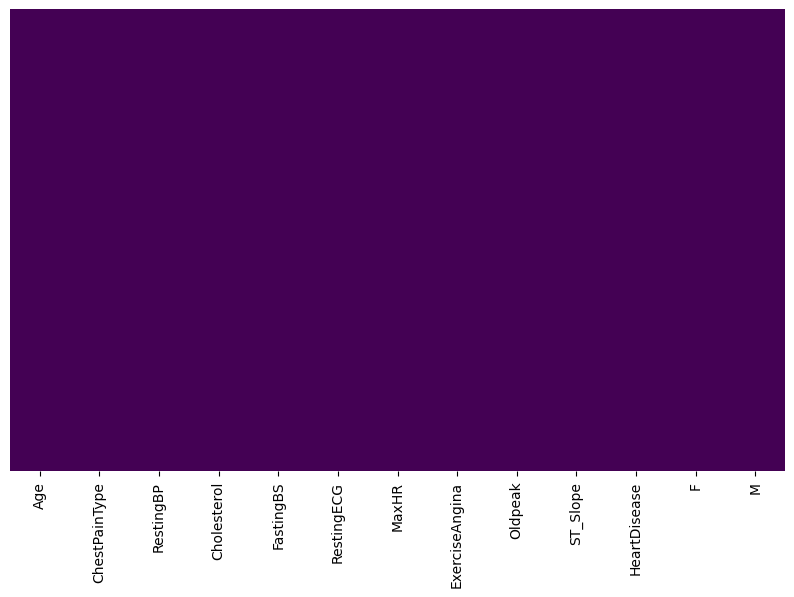

In [21]:
# Only `bmi` has Null values
plt.figure(figsize=(10,6))
sns.heatmap(df_processed.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Splitting dataset

In [22]:
X = df_processed.drop('HeartDisease', axis=1)
X.shape

(918, 12)

In [23]:
y = df_processed['HeartDisease']
y.shape

(918,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
df_processed

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,2,0,0,1
1,49,2,160,180,0,1,156,0,1.0,1,1,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,0,1
3,48,0,138,214,0,1,108,1,1.5,1,1,1,0
4,54,2,150,195,0,1,122,0,0.0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,3,110,264,0,1,132,0,1.2,1,1,0,1
914,68,0,144,193,1,1,141,0,3.4,1,1,0,1
915,57,0,130,131,0,1,115,1,1.2,1,1,0,1
916,57,1,130,236,0,0,174,0,0.0,1,1,1,0


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
X = df_processed.drop("HeartDisease", axis=1)
y = df_processed["HeartDisease"]

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
sgd_clf = SGDClassifier(loss="log_loss", max_iter=1000, random_state=1)

sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(loss='log_loss', random_state=1)

In [31]:
y_pred = sgd_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8478260869565217
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       109
           1       0.88      0.87      0.87       167

    accuracy                           0.85       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



In [32]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet']
}

In [33]:
sgd_clf = SGDClassifier(loss="log_loss", max_iter=1000, random_state=1)
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(loss='log_loss', random_state=1),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [34]:
best_params = grid_search.best_params_

In [35]:
best_sgd_clf = SGDClassifier(loss="log_loss", max_iter=1000, random_state=1, **best_params)
best_sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', penalty='l1', random_state=1)

In [36]:
y_pred_best = best_sgd_clf.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)


In [37]:
print(f"Best Model - Accuracy: {accuracy_best}")
print("Best Model - Classification Report:\n", report_best)
print("Best Hyperparameters:", best_params)


Best Model - Accuracy: 0.8804347826086957
Best Model - Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       109
           1       0.92      0.88      0.90       167

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Best Hyperparameters: {'alpha': 0.01, 'penalty': 'l1'}


In [45]:
np.random.seed(1)
randomly_selected_features = np.random.choice(X_train_scaled.shape[1], size=10, replace=False)
X_train_reduced = X_train_scaled[:, randomly_selected_features]
X_test_reduced = X_test_scaled[:, randomly_selected_features]

best_sgd_clf.fit(X_train_reduced, y_train)

y_pred_reduced = best_sgd_clf.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
report_reduced = classification_report(y_test, y_pred_reduced)

print(f"Model with Reduced Features - Accuracy: {accuracy_reduced}")
print("Model with Reduced Features - Classification Report:\n", report_reduced)

Model with Reduced Features - Accuracy: 0.8623188405797102
Model with Reduced Features - Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       109
           1       0.91      0.86      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276

